# Multiple Linear Regression

# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [3]:
bikes = pd.read_csv("day.csv") 

In [4]:
# checking head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Analyze various aspects of bikes dataset

In [5]:
bikes.shape

(730, 16)

In [6]:
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Understanding the Data Dictionary and parts of Data Preparation
The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [8]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
bikes.loc[(bikes['season'] == 1) , 'season'] = 'spring'

# 2=summer
bikes.loc[(bikes['season'] == 2) , 'season'] = 'summer'

# 3=fall
bikes.loc[(bikes['season'] == 3) , 'season'] = 'fall'

# 4=winter
bikes.loc[(bikes['season'] == 4) , 'season'] = 'winter'

In [9]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bikes['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# year (0: 2018, 1:2019)
bikes['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bikes[['mnth']] = bikes[['mnth']].apply(object_map)

In [13]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
bikes['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [14]:
bikes['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
bikes[['weekday']] = bikes[['weekday']].apply(str_map)

In [16]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bikes['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [17]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bikes['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [18]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bikes.loc[(bikes['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bikes.loc[(bikes['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bikes.loc[(bikes['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikes.loc[(bikes['weathersit'] == 4) , 'weathersit'] = 'D'

In [19]:
# Extracting the type of weather situations present in the data
bikes['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [20]:
bikes['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [21]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

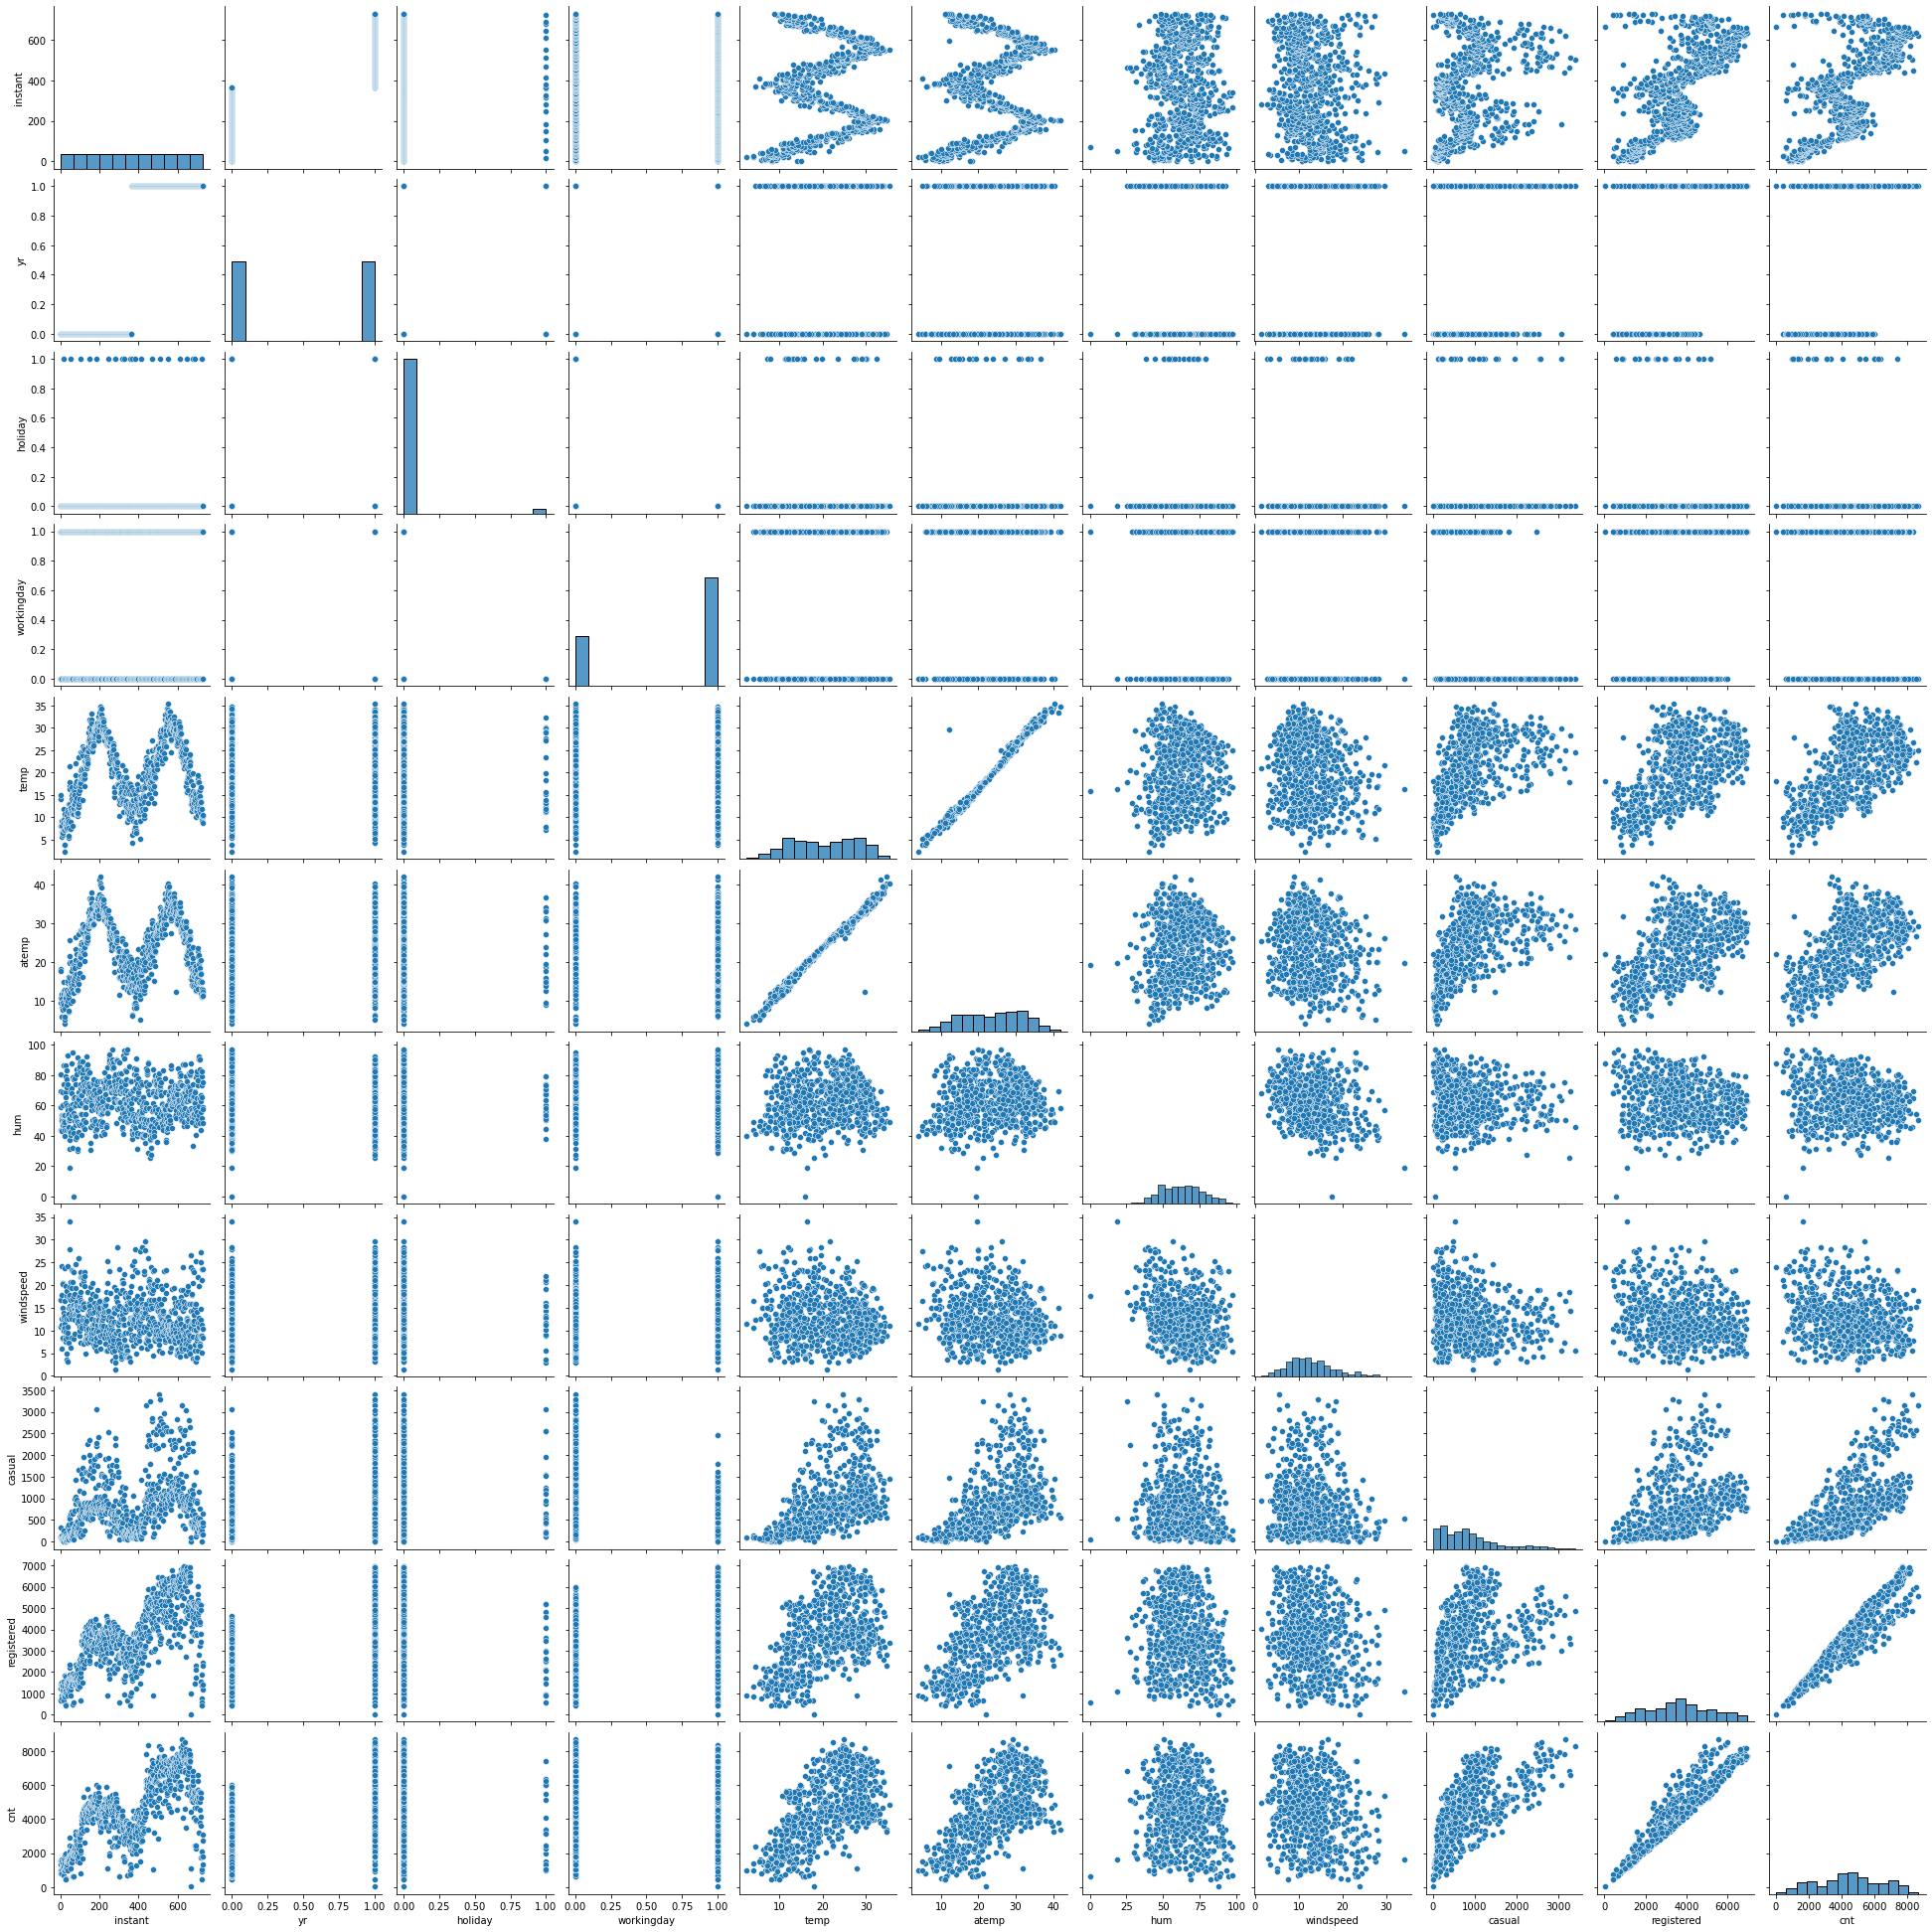

In [22]:
## visualizing numerical variables
sns.pairplot(bikes)
plt.show()

In [23]:
#Auto EDA
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(bikes)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
# Converting date to datetime format
bikes['dteday']=bikes['dteday'].astype('datetime64')

In [25]:
# All categorical variables in the dataset
bikes_categorical=bikes.select_dtypes(exclude=['float64','datetime64','int64'])
print(bikes_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


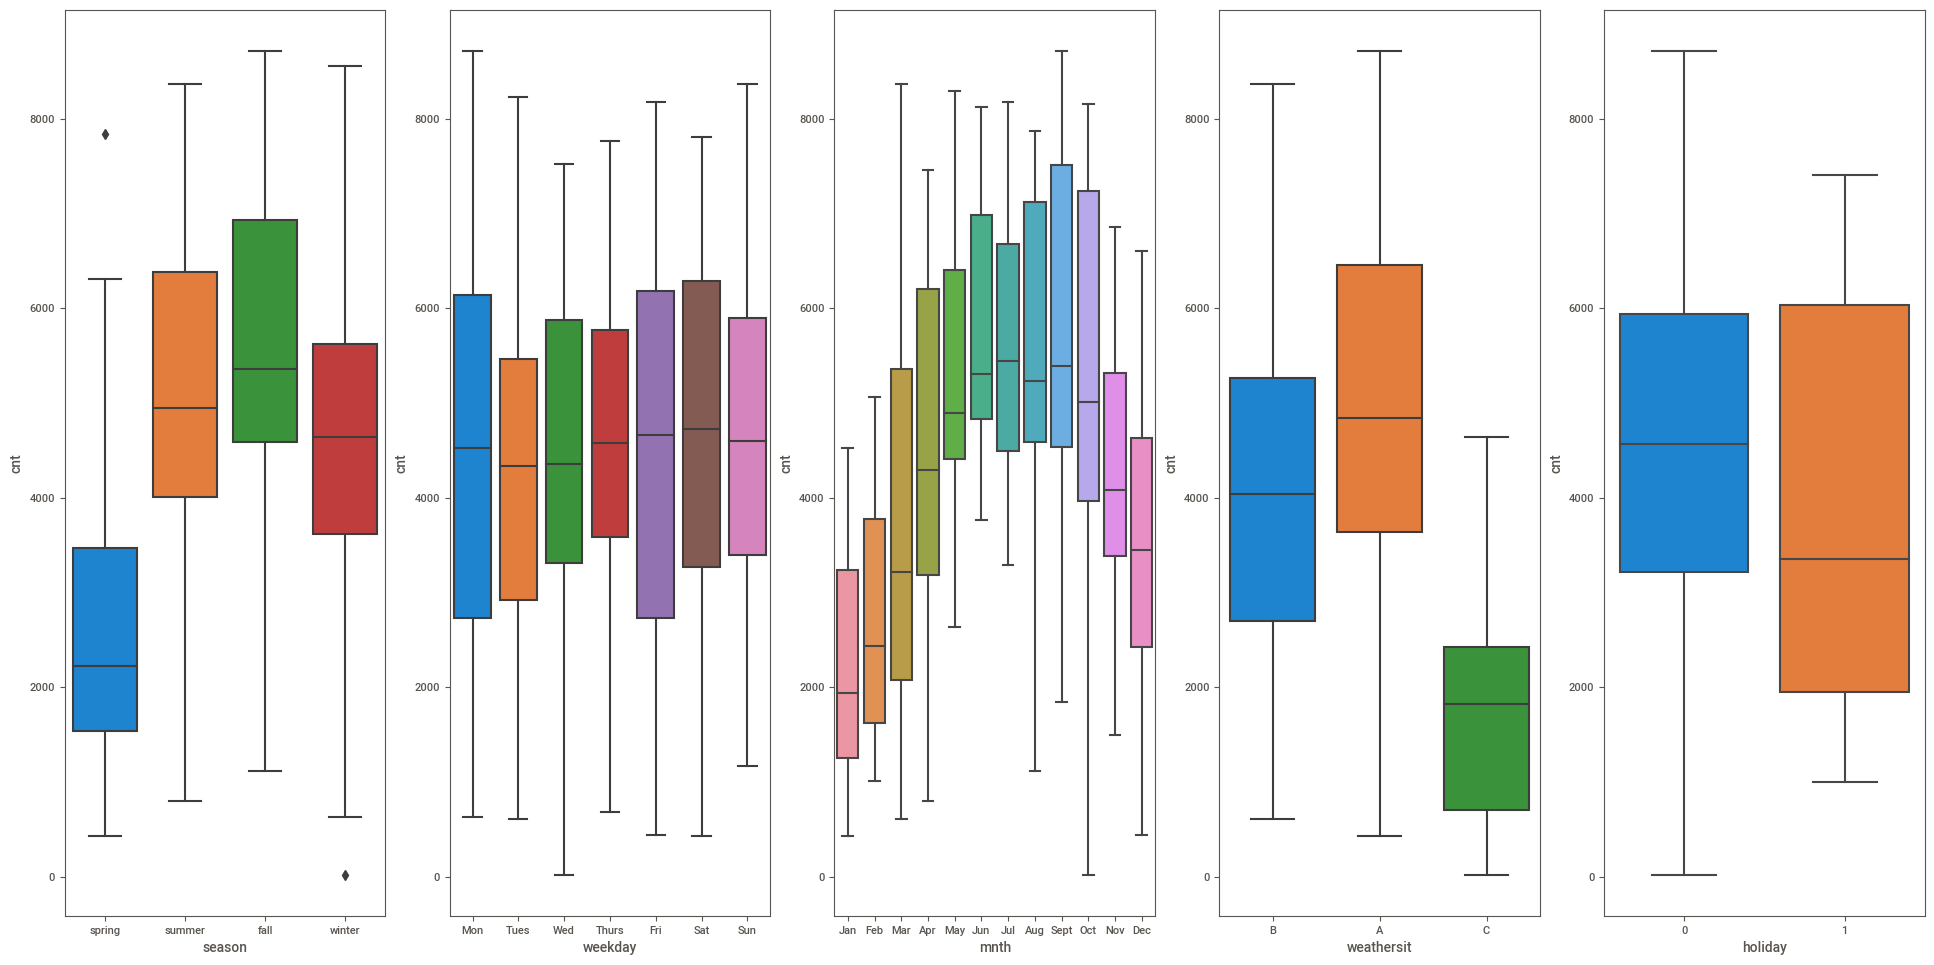

In [26]:
#visualizing the categorical variable
plt.figure(figsize=(24, 12))
plt.subplot(1,5,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(1,5,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(1,5,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(1,5,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(1,5,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.show()

In [27]:
# creating dummy variables 
#bikes.head()
status_dummies = pd.get_dummies(bikes_categorical,drop_first=True)
status_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Drop categorical variable columns
bikes = bikes.drop(list(bikes_categorical.columns), axis=1)

In [29]:
# Concatenate dummy variables with the original dataframe
bikes = pd.concat([bikes, status_dummies], axis=1)



In [30]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bikes=bikes.drop(['instant','dteday'], axis = 1, inplace = False)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


# Splitting into train and test


In [31]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling


In [32]:
scaler = MinMaxScaler()

var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [33]:
df_train[var].describe()

,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the model

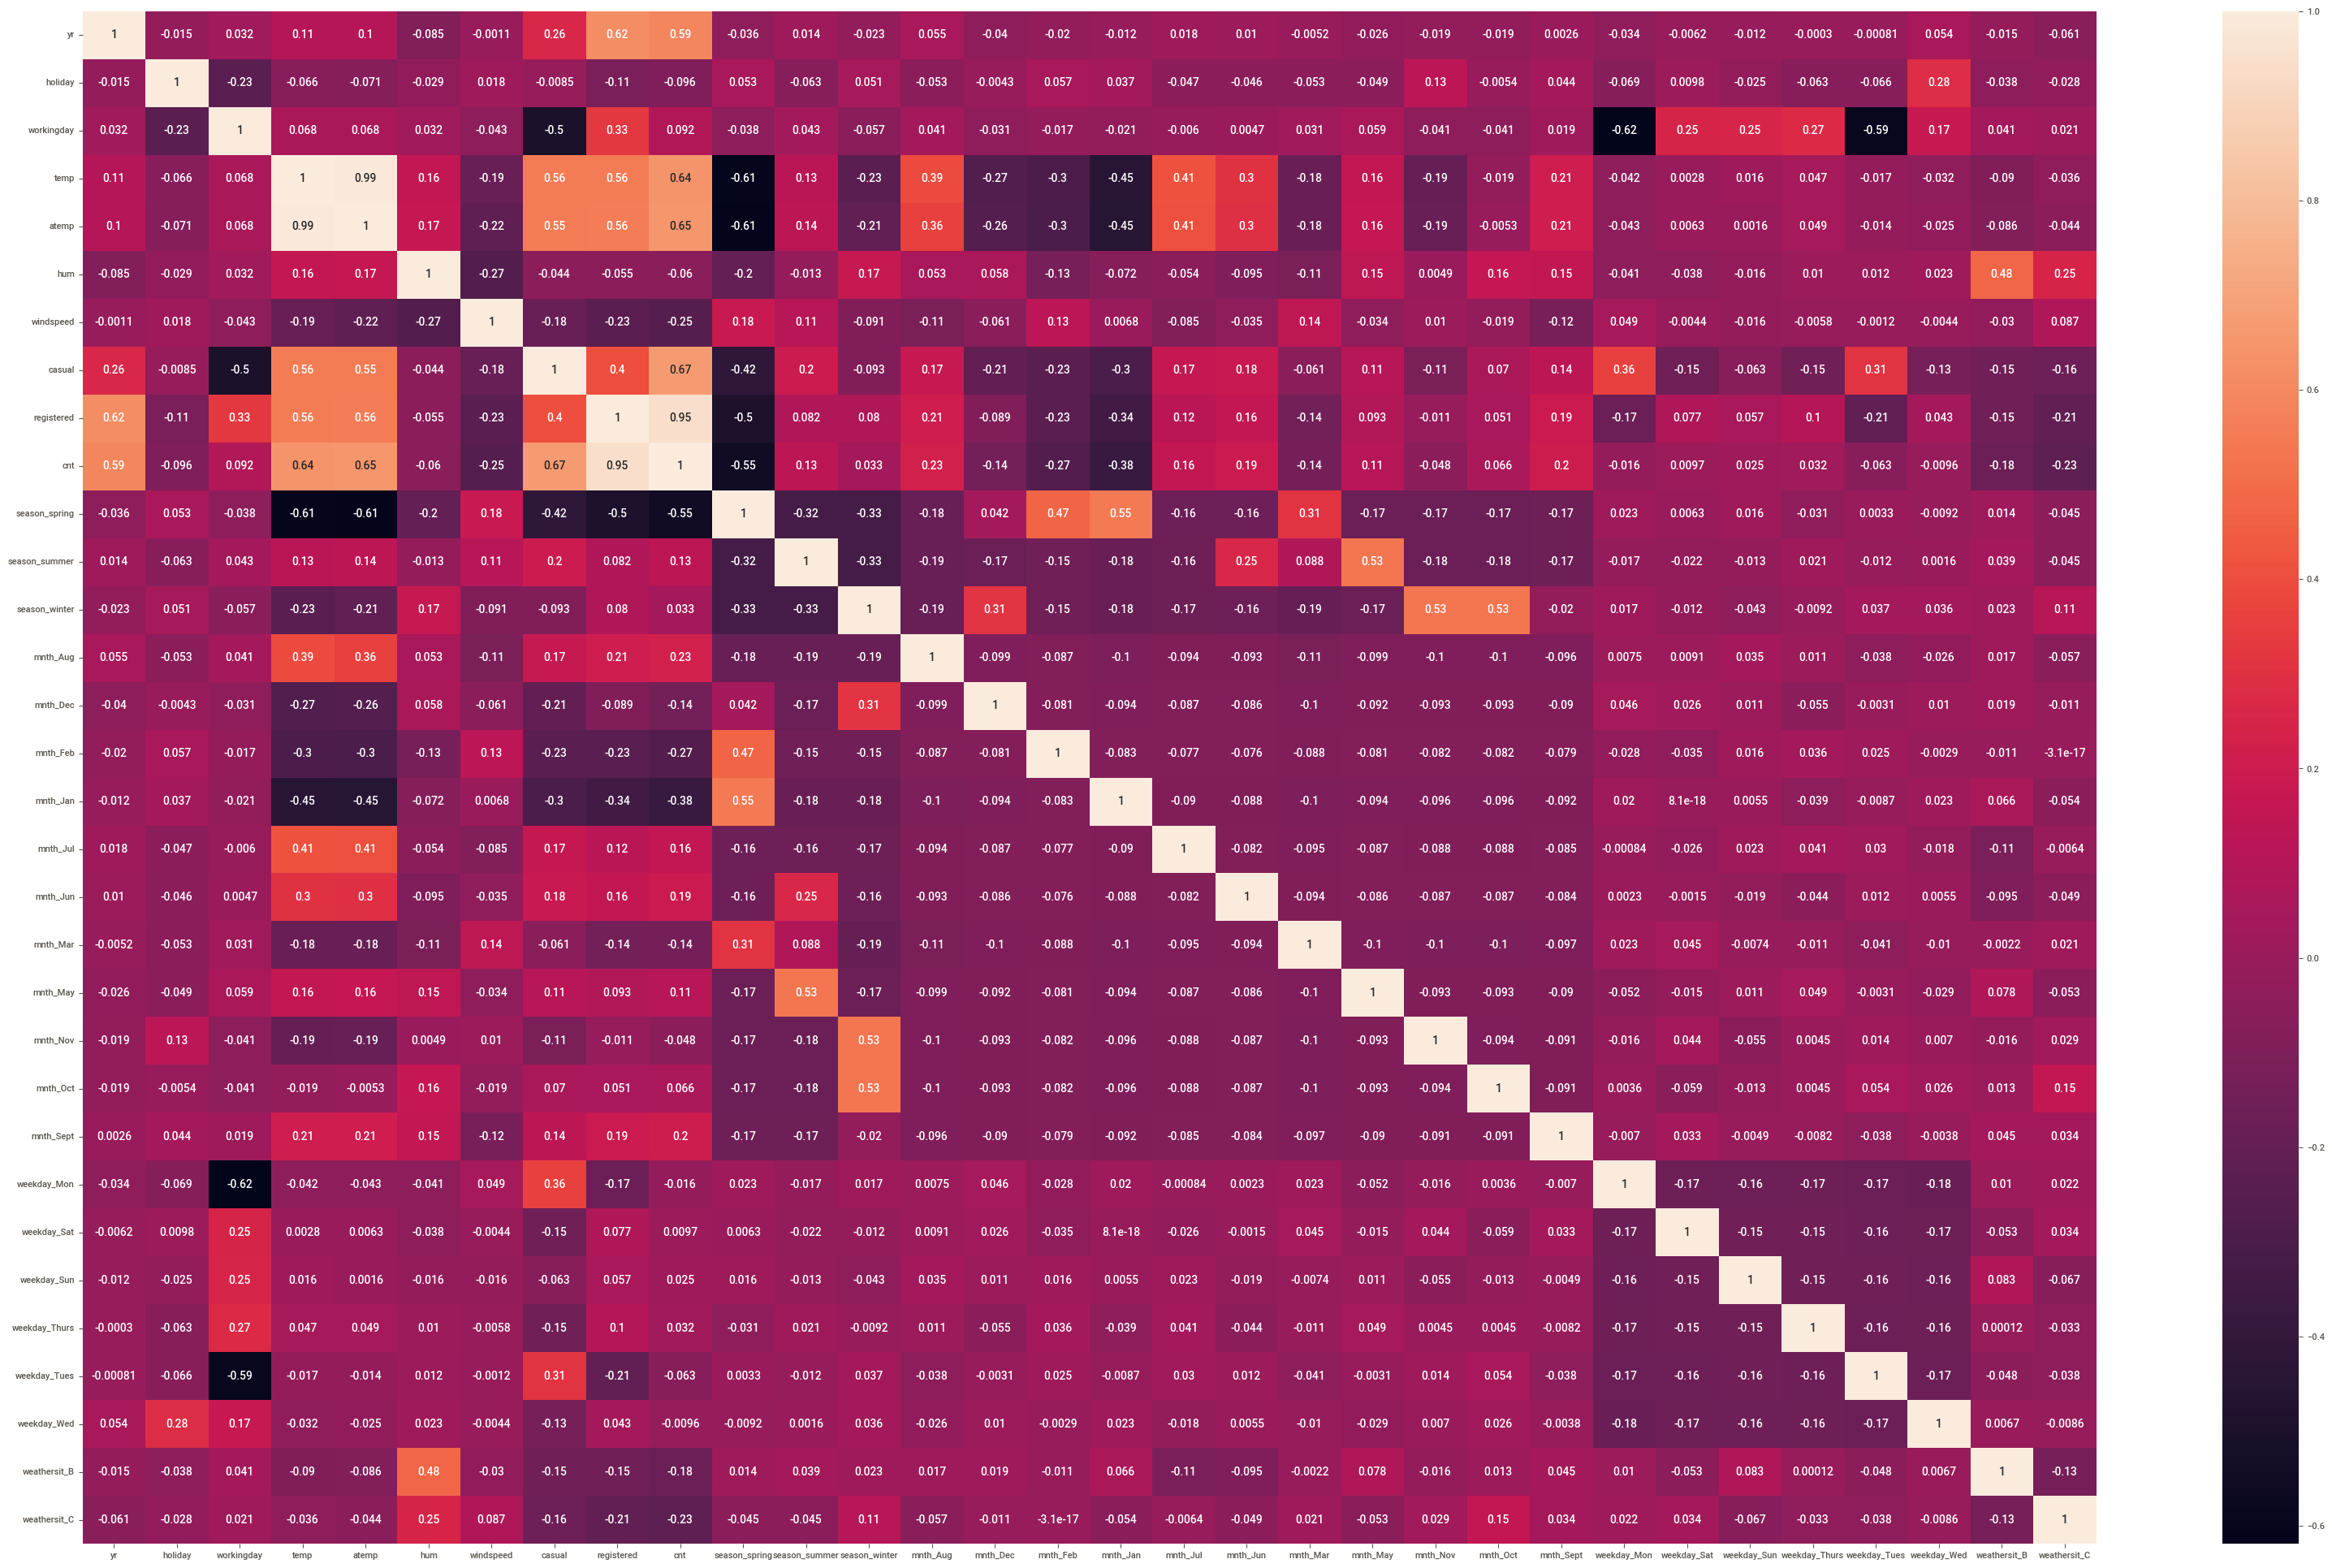

In [34]:
# heatmap
plt.figure(figsize=(40,25))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [35]:
#x_train, y_train

y_train = df_train.pop('cnt')
x_train = df_train.drop(["casual","registered"],axis=1) 



# Adding all variables to the model

In [36]:
# build a model with all variables
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

#y_train.describe()
#x_train_sm.columns

# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        23:46:24   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2387      0.037      6.404      0.000       0.165       0.312
yr                0.2322      0.008     28.792      0.000       0.216       0.248
holiday           0.0062      0.024      0.255      0.798      -0.041       0.054
workingday        0.0925      0.012      7.417      0.000       0.068       0.117
temp              0.4013      0.142      2.821      0.005       0.122       0.681
atemp             0.0013      0.004      0.366      0.714      -0.006       0.008
hum              -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed        -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring    -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer     0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter     0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug          0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec         -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb         -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan         -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul         -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun         -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar          0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May          0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov         -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct          0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept         0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon       0.0973      0.014      6.984      0.000       0.070       0.125
weekday_Sat      -0.0040      0.015     -0.274      0.784      -0.033       0.025
weekday_Sun       0.0057      0.015      0.384      0.701      -0.024       0.035
weekday_Thurs    -0.0136      0.015     -0.921      0.357      -0.043       0.015
weekday_Tues      0.0428      0.014      3.029      0.003       0.015       0.071
weekday_Wed      -0.0158      0.015     -1.079      0.281      -0.044       0.013
weathersit_B     -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.            

In [37]:
## VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,96.29
3,temp,67.12
4,atemp,56.09
21,weekday_Mon,21.94
25,weekday_Tues,20.40
7,season_spring,10.80
9,season_winter,9.52
8,season_summer,8.31
18,mnth_Nov,6.80
19,mnth_Oct,6.59


In [38]:
x=  x_train.drop('mnth_Mar',axis=1)

In [39]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.19e-182
Time:                        23:46:24   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.035      6.835      0.000       0.171       0.308
yr                0.2322      0.008     28.822      0.000       0.216       0.248
holiday           0.0063      0.024      0.264      0.792      -0.041       0.054
workingday        0.0926      0.012      7.731      0.000       0.069       0.116
temp              0.4011      0.142      2.824      0.005       0.122       0.680
atemp             0.0013      0.004      0.365      0.715      -0.006       0.008
hum              -0.1516      0.038     -3.953      0.000      -0.227      -0.076
windspeed        -0.1845      0.026     -7.024      0.000      -0.236      -0.133
season_spring    -0.0481      0.028     -1.692      0.091      -0.104       0.008
season_summer     0.0380      0.026      1.474      0.141      -0.013       0.089
season_winter     0.1057      0.027      3.851      0.000       0.052       0.160
mnth_Aug          0.0155      0.032      0.483      0.629      -0.047       0.078
mnth_Dec         -0.0467      0.026     -1.799      0.073      -0.098       0.004
mnth_Feb         -0.0334      0.022     -1.501      0.134      -0.077       0.010
mnth_Jan         -0.0639      0.022     -2.862      0.004      -0.108      -0.020
mnth_Jul         -0.0398      0.034     -1.189      0.235      -0.106       0.026
mnth_Jun         -0.0021      0.024     -0.089      0.929      -0.049       0.045
mnth_May          0.0243      0.020      1.231      0.219      -0.014       0.063
mnth_Nov         -0.0428      0.031     -1.391      0.165      -0.103       0.018
mnth_Oct          0.0067      0.031      0.220      0.826      -0.053       0.067
mnth_Sept         0.0811      0.029      2.786      0.006       0.024       0.138
weekday_Mon       0.0975      0.013      7.232      0.000       0.071       0.124
weekday_Sat      -0.0040      0.015     -0.272      0.785      -0.033       0.025
weekday_Sun       0.0057      0.015      0.384      0.701      -0.024       0.035
weekday_Thurs    -0.0136      0.015     -0.923      0.357      -0.042       0.015
weekday_Tues      0.0429      0.014      3.111      0.002       0.016       0.070
weekday_Wed      -0.0158      0.015     -1.080      0.281      -0.044       0.013
weathersit_B     -0.0610      0.010     -5.852      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.722      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.110   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.070
Skew:                          -0.808   Prob(JB):                     2.01e-52
Kurtosis:                       5.931   Cond. No.                     1.45e+16
================================================================

In [40]:
## VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,84.94
3,temp,67.07
4,atemp,56.05
20,weekday_Mon,19.32
24,weekday_Tues,18.13
7,season_spring,9.70
9,season_winter,9.19
8,season_summer,8.01
10,mnth_Aug,5.81
14,mnth_Jul,5.18


In [41]:
x=  x.drop('mnth_Jun',axis=1)

In [42]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.82e-183
Time:                        23:46:25   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.035      6.888      0.000       0.171       0.307
yr                0.2323      0.008     29.033      0.000       0.217       0.248
holiday           0.0064      0.024      0.265      0.791      -0.041       0.054
workingday        0.0925      0.012      7.782      0.000       0.069       0.116
temp              0.3974      0.135      2.933      0.004       0.131       0.664
atemp             0.0014      0.004      0.381      0.703      -0.006       0.008
hum              -0.1513      0.038     -3.968      0.000      -0.226      -0.076
windspeed        -0.1842      0.026     -7.071      0.000      -0.235      -0.133
season_spring    -0.0473      0.027     -1.752      0.080      -0.100       0.006
season_summer     0.0385      0.025      1.546      0.123      -0.010       0.087
season_winter     0.1061      0.027      3.933      0.000       0.053       0.159
mnth_Aug          0.0173      0.025      0.693      0.488      -0.032       0.066
mnth_Dec         -0.0465      0.026     -1.799      0.073      -0.097       0.004
mnth_Feb         -0.0336      0.022     -1.515      0.130      -0.077       0.010
mnth_Jan         -0.0642      0.022     -2.913      0.004      -0.107      -0.021
mnth_Jul         -0.0379      0.026     -1.474      0.141      -0.089       0.013
mnth_May          0.0251      0.017      1.447      0.149      -0.009       0.059
mnth_Nov         -0.0424      0.030     -1.395      0.164      -0.102       0.017
mnth_Oct          0.0074      0.030      0.250      0.803      -0.051       0.066
mnth_Sept         0.0825      0.024      3.385      0.001       0.035       0.130
weekday_Mon       0.0973      0.013      7.285      0.000       0.071       0.124
weekday_Sat      -0.0039      0.015     -0.270      0.787      -0.033       0.025
weekday_Sun       0.0058      0.015      0.387      0.699      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.920      0.358      -0.042       0.015
weekday_Tues      0.0428      0.014      3.125      0.002       0.016       0.070
weekday_Wed      -0.0158      0.015     -1.082      0.280      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.865      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.732      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.348   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.708
Skew:                          -0.809   Prob(JB):                     8.87e-53
Kurtosis:                       5.943   Cond. No.                     1.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [43]:
## VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.39
3,temp,61.12
4,atemp,55.03
19,weekday_Mon,18.93
23,weekday_Tues,17.78
9,season_winter,8.90
7,season_spring,8.77
8,season_summer,7.51
16,mnth_Nov,4.77
17,mnth_Oct,4.52


In [44]:
x=  x.drop('workingday',axis=1)

In [45]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.82e-183
Time:                        23:46:26   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3315      0.043      7.637      0.000       0.246       0.417
yr                0.2323      0.008     29.033      0.000       0.217       0.248
holiday          -0.0862      0.027     -3.243      0.001      -0.138      -0.034
temp              0.3974      0.135      2.933      0.004       0.131       0.664
atemp             0.0014      0.004      0.381      0.703      -0.006       0.008
hum              -0.1513      0.038     -3.968      0.000      -0.226      -0.076
windspeed        -0.1842      0.026     -7.071      0.000      -0.235      -0.133
season_spring    -0.0473      0.027     -1.752      0.080      -0.100       0.006
season_summer     0.0385      0.025      1.546      0.123      -0.010       0.087
season_winter     0.1061      0.027      3.933      0.000       0.053       0.159
mnth_Aug          0.0173      0.025      0.693      0.488      -0.032       0.066
mnth_Dec         -0.0465      0.026     -1.799      0.073      -0.097       0.004
mnth_Feb         -0.0336      0.022     -1.515      0.130      -0.077       0.010
mnth_Jan         -0.0642      0.022     -2.913      0.004      -0.107      -0.021
mnth_Jul         -0.0379      0.026     -1.474      0.141      -0.089       0.013
mnth_May          0.0251      0.017      1.447      0.149      -0.009       0.059
mnth_Nov         -0.0424      0.030     -1.395      0.164      -0.102       0.017
mnth_Oct          0.0074      0.030      0.250      0.803      -0.051       0.066
mnth_Sept         0.0825      0.024      3.385      0.001       0.035       0.130
weekday_Mon       0.0048      0.014      0.341      0.733      -0.023       0.032
weekday_Sat      -0.0039      0.015     -0.270      0.787      -0.033       0.025
weekday_Sun       0.0058      0.015      0.387      0.699      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.920      0.358      -0.042       0.015
weekday_Tues     -0.0497      0.014     -3.453      0.001      -0.078      -0.021
weekday_Wed      -0.0158      0.015     -1.082      0.280      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.865      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.732      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.348   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.708
Skew:                          -0.809   Prob(JB):                     8.87e-53
Kurtosis:                       5.943   Cond. No.                         867.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
## VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,469.45
2,temp,399.75
4,hum,36.81
8,season_winter,10.71
6,season_spring,8.16
7,season_summer,7.16
5,windspeed,5.11
15,mnth_Nov,4.85
16,mnth_Oct,4.84
9,mnth_Aug,3.40


In [47]:
x=  x.drop('atemp',axis=1)

In [48]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.84e-184
Time:                        23:46:26   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3367      0.041      8.170      0.000       0.256       0.418
yr                0.2322      0.008     29.056      0.000       0.217       0.248
holiday          -0.0868      0.026     -3.274      0.001      -0.139      -0.035
temp              0.4469      0.039     11.585      0.000       0.371       0.523
hum              -0.1506      0.038     -3.958      0.000      -0.225      -0.076
windspeed        -0.1862      0.025     -7.302      0.000      -0.236      -0.136
season_spring    -0.0465      0.027     -1.729      0.084      -0.099       0.006
season_summer     0.0394      0.025      1.592      0.112      -0.009       0.088
season_winter     0.1068      0.027      3.971      0.000       0.054       0.160
mnth_Aug          0.0167      0.025      0.672      0.502      -0.032       0.065
mnth_Dec         -0.0462      0.026     -1.789      0.074      -0.097       0.005
mnth_Feb         -0.0336      0.022     -1.515      0.131      -0.077       0.010
mnth_Jan         -0.0643      0.022     -2.922      0.004      -0.108      -0.021
mnth_Jul         -0.0378      0.026     -1.471      0.142      -0.088       0.013
mnth_May          0.0249      0.017      1.436      0.152      -0.009       0.059
mnth_Nov         -0.0420      0.030     -1.385      0.167      -0.102       0.018
mnth_Oct          0.0078      0.030      0.264      0.792      -0.050       0.066
mnth_Sept         0.0827      0.024      3.396      0.001       0.035       0.131
weekday_Mon       0.0049      0.014      0.345      0.730      -0.023       0.033
weekday_Sat      -0.0038      0.015     -0.257      0.797      -0.032       0.025
weekday_Sun       0.0054      0.015      0.366      0.715      -0.024       0.035
weekday_Thurs    -0.0134      0.015     -0.914      0.361      -0.042       0.015
weekday_Tues     -0.0497      0.014     -3.452      0.001      -0.078      -0.021
weekday_Wed      -0.0155      0.015     -1.066      0.287      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.876      0.000      -0.082      -0.041
weathersit_C     -0.2575      0.026     -9.801      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.799   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.011
Skew:                          -0.804   Prob(JB):                     2.07e-52
Kurtosis:                       5.935   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
## VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.65
2,temp,21.66
7,season_winter,10.36
5,season_spring,7.37
6,season_summer,6.40
4,windspeed,5.05
15,mnth_Oct,4.80
14,mnth_Nov,4.77
8,mnth_Aug,3.39
9,mnth_Dec,3.34


In [50]:
x=  x.drop('weekday_Sat',axis=1)

In [51]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.39e-185
Time:                        23:46:26   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3346      0.040      8.288      0.000       0.255       0.414
yr                0.2322      0.008     29.085      0.000       0.217       0.248
holiday          -0.0871      0.026     -3.292      0.001      -0.139      -0.035
temp              0.4470      0.039     11.602      0.000       0.371       0.523
hum              -0.1504      0.038     -3.956      0.000      -0.225      -0.076
windspeed        -0.1862      0.025     -7.311      0.000      -0.236      -0.136
season_spring    -0.0464      0.027     -1.727      0.085      -0.099       0.006
season_summer     0.0396      0.025      1.600      0.110      -0.009       0.088
season_winter     0.1069      0.027      3.982      0.000       0.054       0.160
mnth_Aug          0.0167      0.025      0.674      0.501      -0.032       0.065
mnth_Dec         -0.0464      0.026     -1.798      0.073      -0.097       0.004
mnth_Feb         -0.0334      0.022     -1.510      0.132      -0.077       0.010
mnth_Jan         -0.0643      0.022     -2.922      0.004      -0.107      -0.021
mnth_Jul         -0.0378      0.026     -1.472      0.142      -0.088       0.013
mnth_May          0.0249      0.017      1.439      0.151      -0.009       0.059
mnth_Nov         -0.0422      0.030     -1.390      0.165      -0.102       0.017
mnth_Oct          0.0078      0.030      0.264      0.792      -0.050       0.066
mnth_Sept         0.0827      0.024      3.400      0.001       0.035       0.130
weekday_Mon       0.0066      0.012      0.531      0.595      -0.018       0.031
weekday_Sun       0.0071      0.013      0.539      0.590      -0.019       0.033
weekday_Thurs    -0.0117      0.013     -0.894      0.372      -0.037       0.014
weekday_Tues     -0.0480      0.013     -3.761      0.000      -0.073      -0.023
weekday_Wed      -0.0138      0.013     -1.071      0.285      -0.039       0.012
weathersit_B     -0.0611      0.010     -5.879      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.807      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       85.187   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.478
Skew:                          -0.807   Prob(JB):                     9.95e-53
Kurtosis:                       5.943   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.54
2,temp,21.31
7,season_winter,10.34
5,season_spring,7.24
6,season_summer,6.32
4,windspeed,5.03
15,mnth_Oct,4.79
14,mnth_Nov,4.75
8,mnth_Aug,3.37
9,mnth_Dec,3.32


In [53]:
x=  x.drop('mnth_Oct',axis=1)

In [54]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.82e-186
Time:                        23:46:27   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3364      0.040      8.467      0.000       0.258       0.415
yr                0.2322      0.008     29.113      0.000       0.217       0.248
holiday          -0.0864      0.026     -3.285      0.001      -0.138      -0.035
temp              0.4461      0.038     11.634      0.000       0.371       0.521
hum              -0.1491      0.038     -3.958      0.000      -0.223      -0.075
windspeed        -0.1858      0.025     -7.315      0.000      -0.236      -0.136
season_spring    -0.0474      0.027     -1.783      0.075      -0.100       0.005
season_summer     0.0374      0.023      1.608      0.109      -0.008       0.083
season_winter     0.1108      0.023      4.900      0.000       0.066       0.155
mnth_Aug          0.0147      0.024      0.623      0.533      -0.032       0.061
mnth_Dec         -0.0512      0.018     -2.827      0.005      -0.087      -0.016
mnth_Feb         -0.0349      0.021     -1.633      0.103      -0.077       0.007
mnth_Jan         -0.0658      0.021     -3.105      0.002      -0.107      -0.024
mnth_Jul         -0.0398      0.025     -1.617      0.106      -0.088       0.009
mnth_May          0.0249      0.017      1.441      0.150      -0.009       0.059
mnth_Nov         -0.0484      0.019     -2.576      0.010      -0.085      -0.011
mnth_Sept         0.0796      0.021      3.724      0.000       0.038       0.122
weekday_Mon       0.0066      0.012      0.534      0.593      -0.018       0.031
weekday_Sun       0.0072      0.013      0.542      0.588      -0.019       0.033
weekday_Thurs    -0.0117      0.013     -0.894      0.372      -0.037       0.014
weekday_Tues     -0.0479      0.013     -3.758      0.000      -0.073      -0.023
weekday_Wed      -0.0138      0.013     -1.077      0.282      -0.039       0.011
weathersit_B     -0.0612      0.010     -5.899      0.000      -0.082      -0.041
weathersit_C     -0.2572      0.026     -9.813      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.376   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.712
Skew:                          -0.802   Prob(JB):                     6.54e-52
Kurtosis:                       5.919   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.94
2,temp,21.30
5,season_spring,7.23
7,season_winter,5.98
6,season_summer,5.74
4,windspeed,4.95
8,mnth_Aug,3.13
12,mnth_Jul,2.81
11,mnth_Jan,2.41
21,weathersit_B,2.36


In [56]:
x=  x.drop('hum',axis=1)

In [57]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.27e-183
Time:                        23:46:27   Log-Likelihood:                 519.78
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     487   BIC:                            -896.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2693      0.036      7.385      0.000       0.198       0.341
yr                0.2358      0.008     29.324      0.000       0.220       0.252
holiday          -0.0863      0.027     -3.233      0.001      -0.139      -0.034
temp              0.4098      0.038     10.844      0.000       0.336       0.484
windspeed        -0.1594      0.025     -6.410      0.000      -0.208      -0.111
season_spring    -0.0571      0.027     -2.125      0.034      -0.110      -0.004
season_summer     0.0311      0.024      1.322      0.187      -0.015       0.077
season_winter     0.0957      0.023      4.231      0.000       0.051       0.140
mnth_Aug          0.0104      0.024      0.434      0.664      -0.037       0.057
mnth_Dec         -0.0587      0.018     -3.208      0.001      -0.095      -0.023
mnth_Feb         -0.0369      0.022     -1.703      0.089      -0.080       0.006
mnth_Jan         -0.0726      0.021     -3.388      0.001      -0.115      -0.030
mnth_Jul         -0.0380      0.025     -1.524      0.128      -0.087       0.011
mnth_May          0.0165      0.017      0.947      0.344      -0.018       0.051
mnth_Nov         -0.0495      0.019     -2.591      0.010      -0.087      -0.012
mnth_Sept         0.0709      0.022      3.282      0.001       0.028       0.113
weekday_Mon       0.0079      0.013      0.630      0.529      -0.017       0.033
weekday_Sun       0.0089      0.013      0.660      0.509      -0.018       0.035
weekday_Thurs    -0.0129      0.013     -0.972      0.332      -0.039       0.013
weekday_Tues     -0.0512      0.013     -3.971      0.000      -0.077      -0.026
weekday_Wed      -0.0159      0.013     -1.223      0.222      -0.042       0.010
weathersit_B     -0.0848      0.009     -9.837      0.000      -0.102      -0.068
weathersit_C     -0.2994      0.024    -12.324      0.000      -0.347      -0.252
==============================================================================
Omnibus:                       87.296   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.905
Skew:                          -0.828   Prob(JB):                     6.60e-54
Kurtosis:                       5.964   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,11.58
4,season_spring,5.55
3,windspeed,4.85
5,season_summer,4.67
6,season_winter,4.37
7,mnth_Aug,2.98
11,mnth_Jul,2.77
10,mnth_Jan,2.28
0,yr,2.10
14,mnth_Sept,1.96


In [59]:
x=  x.drop('temp',axis=1)

In [60]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.05e-162
Time:                        23:46:28   Log-Likelihood:                 464.62
No. Observations:                 510   AIC:                            -885.2
Df Residuals:                     488   BIC:                            -792.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5823      0.025     23.461      0.000       0.534       0.631
yr                0.2467      0.009     27.780      0.000       0.229       0.264
holiday          -0.0728      0.030     -2.451      0.015      -0.131      -0.014
windspeed        -0.1823      0.028     -6.609      0.000      -0.237      -0.128
season_spring    -0.1822      0.027     -6.752      0.000      -0.235      -0.129
season_summer    -0.0468      0.025     -1.876      0.061      -0.096       0.002
season_winter     0.0110      0.024      0.466      0.641      -0.035       0.057
mnth_Aug          0.0328      0.026      1.238      0.216      -0.019       0.085
mnth_Dec         -0.1297      0.019     -6.823      0.000      -0.167      -0.092
mnth_Feb         -0.0974      0.023     -4.176      0.000      -0.143      -0.052
mnth_Jan         -0.1649      0.022     -7.529      0.000      -0.208      -0.122
mnth_Jul          0.0075      0.027      0.273      0.785      -0.046       0.061
mnth_May          0.0570      0.019      3.009      0.003       0.020       0.094
mnth_Nov         -0.1090      0.020     -5.360      0.000      -0.149      -0.069
mnth_Sept         0.0678      0.024      2.824      0.005       0.021       0.115
weekday_Mon       0.0030      0.014      0.213      0.831      -0.024       0.030
weekday_Sun       0.0045      0.015      0.302      0.762      -0.025       0.034
weekday_Thurs    -0.0150      0.015     -1.016      0.310      -0.044       0.014
weekday_Tues     -0.0553      0.014     -3.852      0.000      -0.084      -0.027
weekday_Wed      -0.0224      0.014     -1.549      0.122      -0.051       0.006
weathersit_B     -0.0923      0.010     -9.650      0.000      -0.111      -0.073
weathersit_C     -0.3172      0.027    -11.756      0.000      -0.370      -0.264
==============================================================================
Omnibus:                       77.154   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.736
Skew:                          -0.738   Prob(JB):                     6.38e-47
Kurtosis:                       5.798   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,5.03
2,windspeed,4.65
5,season_winter,3.55
4,season_summer,3.42
9,mnth_Jan,2.17
0,yr,2.00
8,mnth_Feb,1.87
12,mnth_Nov,1.81
19,weathersit_B,1.61
18,weekday_Wed,1.59


In [62]:
x=  x.drop('weekday_Mon',axis=1)

In [63]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.94e-163
Time:                        23:46:29   Log-Likelihood:                 464.60
No. Observations:                 510   AIC:                            -887.2
Df Residuals:                     489   BIC:                            -798.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5831      0.025     23.740      0.000       0.535       0.631
yr                0.2467      0.009     27.811      0.000       0.229       0.264
holiday          -0.0729      0.030     -2.459      0.014      -0.131      -0.015
windspeed        -0.1820      0.028     -6.613      0.000      -0.236      -0.128
season_spring    -0.1820      0.027     -6.755      0.000      -0.235      -0.129
season_summer    -0.0465      0.025     -1.870      0.062      -0.095       0.002
season_winter     0.0113      0.024      0.482      0.630      -0.035       0.058
mnth_Aug          0.0330      0.026      1.250      0.212      -0.019       0.085
mnth_Dec         -0.1296      0.019     -6.828      0.000      -0.167      -0.092
mnth_Feb         -0.0975      0.023     -4.182      0.000      -0.143      -0.052
mnth_Jan         -0.1648      0.022     -7.535      0.000      -0.208      -0.122
mnth_Jul          0.0078      0.027      0.286      0.775      -0.046       0.061
mnth_May          0.0569      0.019      3.005      0.003       0.020       0.094
mnth_Nov         -0.1092      0.020     -5.379      0.000      -0.149      -0.069
mnth_Sept         0.0679      0.024      2.830      0.005       0.021       0.115
weekday_Sun       0.0035      0.014      0.246      0.805      -0.024       0.031
weekday_Thurs    -0.0160      0.014     -1.151      0.250      -0.043       0.011
weekday_Tues     -0.0563      0.013     -4.180      0.000      -0.083      -0.030
weekday_Wed      -0.0235      0.014     -1.717      0.087      -0.050       0.003
weathersit_B     -0.0922      0.010     -9.657      0.000      -0.111      -0.073
weathersit_C     -0.3174      0.027    -11.784      0.000      -0.370      -0.264
==============================================================================
Omnibus:                       76.575   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.007
Skew:                          -0.732   Prob(JB):                     9.19e-47
Kurtosis:                       5.799   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,4.87
2,windspeed,4.60
5,season_winter,3.36
4,season_summer,3.25
9,mnth_Jan,2.17
0,yr,2.00
8,mnth_Feb,1.87
12,mnth_Nov,1.81
18,weathersit_B,1.61
11,mnth_May,1.56


In [65]:
x=  x.drop('weekday_Sun',axis=1)

In [66]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.72e-164
Time:                        23:46:29   Log-Likelihood:                 464.57
No. Observations:                 510   AIC:                            -889.1
Df Residuals:                     490   BIC:                            -804.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5839      0.024     24.020      0.000       0.536       0.632
yr                0.2466      0.009     27.837      0.000       0.229       0.264
holiday          -0.0727      0.030     -2.457      0.014      -0.131      -0.015
windspeed        -0.1821      0.027     -6.621      0.000      -0.236      -0.128
season_spring    -0.1821      0.027     -6.767      0.000      -0.235      -0.129
season_summer    -0.0467      0.025     -1.878      0.061      -0.096       0.002
season_winter     0.0113      0.024      0.481      0.631      -0.035       0.058
mnth_Aug          0.0330      0.026      1.250      0.212      -0.019       0.085
mnth_Dec         -0.1296      0.019     -6.836      0.000      -0.167      -0.092
mnth_Feb         -0.0973      0.023     -4.181      0.000      -0.143      -0.052
mnth_Jan         -0.1648      0.022     -7.543      0.000      -0.208      -0.122
mnth_Jul          0.0079      0.027      0.290      0.772      -0.046       0.061
mnth_May          0.0569      0.019      3.013      0.003       0.020       0.094
mnth_Nov         -0.1095      0.020     -5.402      0.000      -0.149      -0.070
mnth_Sept         0.0678      0.024      2.828      0.005       0.021       0.115
weekday_Thurs    -0.0168      0.014     -1.243      0.215      -0.043       0.010
weekday_Tues     -0.0571      0.013     -4.364      0.000      -0.083      -0.031
weekday_Wed      -0.0243      0.013     -1.829      0.068      -0.050       0.002
weathersit_B     -0.0921      0.010     -9.674      0.000      -0.111      -0.073
weathersit_C     -0.3179      0.027    -11.850      0.000      -0.371      -0.265
==============================================================================
Omnibus:                       76.869   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.862
Skew:                          -0.734   Prob(JB):                     5.99e-47
Kurtosis:                       5.804   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,4.81
2,windspeed,4.60
5,season_winter,3.29
4,season_summer,3.19
9,mnth_Jan,2.17
0,yr,2.00
8,mnth_Feb,1.87
12,mnth_Nov,1.81
17,weathersit_B,1.60
11,mnth_May,1.56


In [68]:
x=  x.drop('mnth_Jul',axis=1)

In [69]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.42e-165
Time:                        23:46:30   Log-Likelihood:                 464.52
No. Observations:                 510   AIC:                            -891.0
Df Residuals:                     491   BIC:                            -810.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5891      0.016     36.113      0.000       0.557       0.621
yr                0.2467      0.009     27.871      0.000       0.229       0.264
holiday          -0.0729      0.030     -2.464      0.014      -0.131      -0.015
windspeed        -0.1822      0.027     -6.635      0.000      -0.236      -0.128
season_spring    -0.1871      0.021     -9.112      0.000      -0.228      -0.147
season_summer    -0.0519      0.017     -3.007      0.003      -0.086      -0.018
season_winter     0.0068      0.017      0.387      0.699      -0.028       0.041
mnth_Aug          0.0278      0.019      1.440      0.151      -0.010       0.066
mnth_Dec         -0.1301      0.019     -6.895      0.000      -0.167      -0.093
mnth_Feb         -0.0975      0.023     -4.192      0.000      -0.143      -0.052
mnth_Jan         -0.1650      0.022     -7.559      0.000      -0.208      -0.122
mnth_May          0.0569      0.019      3.014      0.003       0.020       0.094
mnth_Nov         -0.1101      0.020     -5.467      0.000      -0.150      -0.071
mnth_Sept         0.0636      0.019      3.331      0.001       0.026       0.101
weekday_Thurs    -0.0167      0.014     -1.234      0.218      -0.043       0.010
weekday_Tues     -0.0571      0.013     -4.364      0.000      -0.083      -0.031
weekday_Wed      -0.0243      0.013     -1.833      0.067      -0.050       0.002
weathersit_B     -0.0921      0.010     -9.684      0.000      -0.111      -0.073
weathersit_C     -0.3181      0.027    -11.870      0.000      -0.371      -0.265
==============================================================================
Omnibus:                       77.018   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.765
Skew:                          -0.735   Prob(JB):                     3.82e-47
Kurtosis:                       5.810   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_spring,4.44
2,windspeed,4.04
5,season_winter,3.04
4,season_summer,2.81
9,mnth_Jan,2.17
0,yr,1.91
8,mnth_Feb,1.87
11,mnth_Nov,1.81
16,weathersit_B,1.59
10,mnth_May,1.55


In [71]:
x=  x.drop('season_winter',axis=1)

In [72]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     124.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.14e-166
Time:                        23:46:30   Log-Likelihood:                 464.45
No. Observations:                 510   AIC:                            -892.9
Df Residuals:                     492   BIC:                            -816.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5921      0.014     41.325      0.000       0.564       0.620
yr                0.2467      0.009     27.897      0.000       0.229       0.264
holiday          -0.0730      0.030     -2.470      0.014      -0.131      -0.015
windspeed        -0.1820      0.027     -6.634      0.000      -0.236      -0.128
season_spring    -0.1912      0.018    -10.834      0.000      -0.226      -0.157
season_summer    -0.0552      0.015     -3.694      0.000      -0.085      -0.026
mnth_Aug          0.0245      0.017      1.415      0.158      -0.010       0.059
mnth_Dec         -0.1275      0.018     -7.245      0.000      -0.162      -0.093
mnth_Feb         -0.0967      0.023     -4.178      0.000      -0.142      -0.051
mnth_Jan         -0.1643      0.022     -7.560      0.000      -0.207      -0.122
mnth_May          0.0569      0.019      3.016      0.003       0.020       0.094
mnth_Nov         -0.1066      0.018     -5.905      0.000      -0.142      -0.071
mnth_Sept         0.0617      0.018      3.344      0.001       0.025       0.098
weekday_Thurs    -0.0166      0.014     -1.231      0.219      -0.043       0.010
weekday_Tues     -0.0569      0.013     -4.358      0.000      -0.083      -0.031
weekday_Wed      -0.0241      0.013     -1.822      0.069      -0.050       0.002
weathersit_B     -0.0916      0.009     -9.712      0.000      -0.110      -0.073
weathersit_C     -0.3171      0.027    -11.899      0.000      -0.369      -0.265
==============================================================================
Omnibus:                       75.640   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.868
Skew:                          -0.727   Prob(JB):                     1.20e-45
Kurtosis:                       5.761   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
x=  x.drop('weekday_Thurs',axis=1)

In [74]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.32e-167
Time:                        23:46:30   Log-Likelihood:                 463.66
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     493   BIC:                            -821.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5884      0.014     41.966      0.000       0.561       0.616
yr                0.2466      0.009     27.876      0.000       0.229       0.264
holiday          -0.0722      0.030     -2.442      0.015      -0.130      -0.014
windspeed        -0.1820      0.027     -6.629      0.000      -0.236      -0.128
season_spring    -0.1902      0.018    -10.783      0.000      -0.225      -0.156
season_summer    -0.0546      0.015     -3.652      0.000      -0.084      -0.025
mnth_Aug          0.0251      0.017      1.448      0.148      -0.009       0.059
mnth_Dec         -0.1263      0.018     -7.185      0.000      -0.161      -0.092
mnth_Feb         -0.0982      0.023     -4.242      0.000      -0.144      -0.053
mnth_Jan         -0.1641      0.022     -7.550      0.000      -0.207      -0.121
mnth_May          0.0560      0.019      2.970      0.003       0.019       0.093
mnth_Nov         -0.1064      0.018     -5.889      0.000      -0.142      -0.071
mnth_Sept         0.0625      0.018      3.384      0.001       0.026       0.099
weekday_Tues     -0.0537      0.013     -4.195      0.000      -0.079      -0.029
weekday_Wed      -0.0211      0.013     -1.622      0.106      -0.047       0.004
weathersit_B     -0.0915      0.009     -9.693      0.000      -0.110      -0.073
weathersit_C     -0.3155      0.027    -11.846      0.000      -0.368      -0.263
==============================================================================
Omnibus:                       77.371   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.866
Skew:                          -0.726   Prob(JB):                     4.03e-49
Kurtosis:                       5.895   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
x=  x.drop('mnth_Aug',axis=1)

In [76]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.18e-167
Time:                        23:46:31   Log-Likelihood:                 462.58
No. Observations:                 510   AIC:                            -893.2
Df Residuals:                     494   BIC:                            -825.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5968      0.013     46.665      0.000       0.572       0.622
yr                0.2471      0.009     27.911      0.000       0.230       0.264
holiday          -0.0722      0.030     -2.439      0.015      -0.130      -0.014
windspeed        -0.1832      0.027     -6.668      0.000      -0.237      -0.129
season_spring    -0.1964      0.017    -11.461      0.000      -0.230      -0.163
season_summer    -0.0626      0.014     -4.505      0.000      -0.090      -0.035
mnth_Dec         -0.1326      0.017     -7.770      0.000      -0.166      -0.099
mnth_Feb         -0.0999      0.023     -4.317      0.000      -0.145      -0.054
mnth_Jan         -0.1662      0.022     -7.651      0.000      -0.209      -0.124
mnth_May          0.0557      0.019      2.952      0.003       0.019       0.093
mnth_Nov         -0.1143      0.017     -6.636      0.000      -0.148      -0.080
mnth_Sept         0.0543      0.018      3.085      0.002       0.020       0.089
weekday_Tues     -0.0549      0.013     -4.293      0.000      -0.080      -0.030
weekday_Wed      -0.0218      0.013     -1.679      0.094      -0.047       0.004
weathersit_B     -0.0908      0.009     -9.620      0.000      -0.109      -0.072
weathersit_C     -0.3187      0.027    -11.999      0.000      -0.371      -0.267
==============================================================================
Omnibus:                       81.653   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.382
Skew:                          -0.762   Prob(JB):                     1.72e-52
Kurtosis:                       5.983   Cond. No.                         9.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
x=  x.drop('weekday_Wed',axis=1)

In [78]:
# create another model
x_train_sm = sm.add_constant(x)


# create model
lr = sm.OLS(y_train,x_train_sm)
#sm.OLS(y.astype(float), X.astype(float)).fit()

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.06e-168
Time:                        23:46:31   Log-Likelihood:                 461.13
No. Observations:                 510   AIC:                            -892.3
Df Residuals:                     495   BIC:                            -828.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5935      0.013     46.875      0.000       0.569       0.618
yr                0.2462      0.009     27.809      0.000       0.229       0.264
holiday          -0.0859      0.028     -3.013      0.003      -0.142      -0.030
windspeed        -0.1829      0.028     -6.647      0.000      -0.237      -0.129
season_spring    -0.1952      0.017    -11.380      0.000      -0.229      -0.161
season_summer    -0.0629      0.014     -4.519      0.000      -0.090      -0.036
mnth_Dec         -0.1330      0.017     -7.780      0.000      -0.167      -0.099
mnth_Feb         -0.1004      0.023     -4.333      0.000      -0.146      -0.055
mnth_Jan         -0.1674      0.022     -7.697      0.000      -0.210      -0.125
mnth_May          0.0567      0.019      3.000      0.003       0.020       0.094
mnth_Nov         -0.1134      0.017     -6.575      0.000      -0.147      -0.080
mnth_Sept         0.0551      0.018      3.131      0.002       0.021       0.090
weekday_Tues     -0.0515      0.013     -4.069      0.000      -0.076      -0.027
weathersit_B     -0.0910      0.009     -9.623      0.000      -0.110      -0.072
weathersit_C     -0.3187      0.027    -11.975      0.000      -0.371      -0.266
==============================================================================
Omnibus:                       79.903   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.894
Skew:                          -0.747   Prob(JB):                     4.41e-51
Kurtosis:                       5.946   Cond. No.                         9.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,season_spring,3.63
2,windspeed,3.30
4,season_summer,2.30
7,mnth_Jan,2.13
6,mnth_Feb,1.84
0,yr,1.75
8,mnth_May,1.55
12,weathersit_B,1.49
9,mnth_Nov,1.24
5,mnth_Dec,1.18


In [80]:

# Observation
# p-value of the features and v if both low we can conclude that is our final model
# Residual Analysis

In [81]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

653    0.784712
576    0.791317
426    0.506862
728    0.338806
482    0.651404
         ...   
526    0.620834
578    0.805502
53     0.277539
350    0.290573
79     0.342737
Length: 510, dtype: float64

# Residual Analysis 

<AxesSubplot:ylabel='Density'>

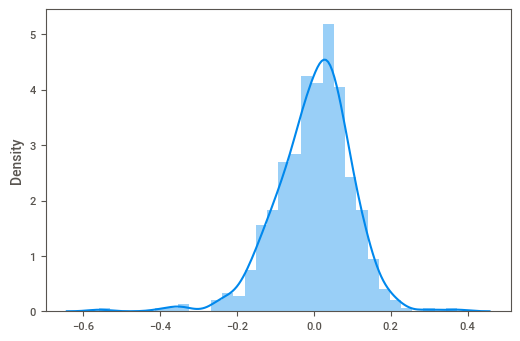

In [82]:
res = y_train - y_train_pred
sns.distplot(res)

In [83]:
df_test[var] = scaler.transform(df_test[var])

# Prediction and Evaluation on the Test set

In [84]:
y_test = df_test.pop('cnt')
x_test = df_test

In [85]:
# add a constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,1.0,0,1,0,0.831783,33.27085,0.657364,0.084219,0.933557,0.427086,...,0,0,0,0,0,0,0,1,1,0
535,1.0,1,0,1,0.901354,36.04875,0.610133,0.153728,0.265163,0.767976,...,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,22.85230,0.837699,0.334206,0.072539,0.346376,...,1,0,0,1,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,34.24915,0.437098,0.339570,0.268820,0.559630,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,32.19710,0.314298,0.537414,0.223712,0.608143,...,0,0,0,1,0,0,0,0,0,0


In [86]:
x_test_sm = x_test_sm.drop(['casual','registered','mnth_Mar','mnth_Jun','workingday','atemp','weekday_Sat','mnth_Oct','hum','temp','weekday_Mon','weekday_Sun','mnth_Jul','season_winter','weekday_Thurs','mnth_Aug','weekday_Wed'], axis=1)

In [87]:
y_test_pred = lr_model.predict(x_test_sm)

In [88]:
# evaluate the model

In [89]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7935111213163412

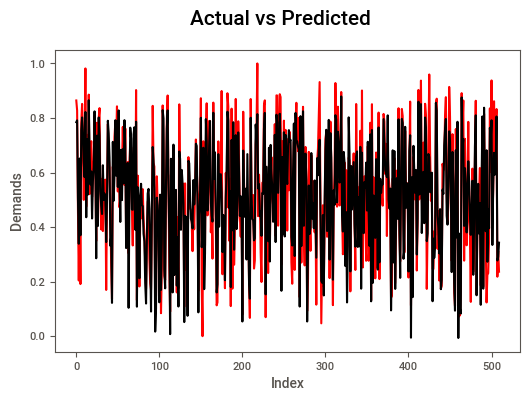

In [90]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pred, color="black")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

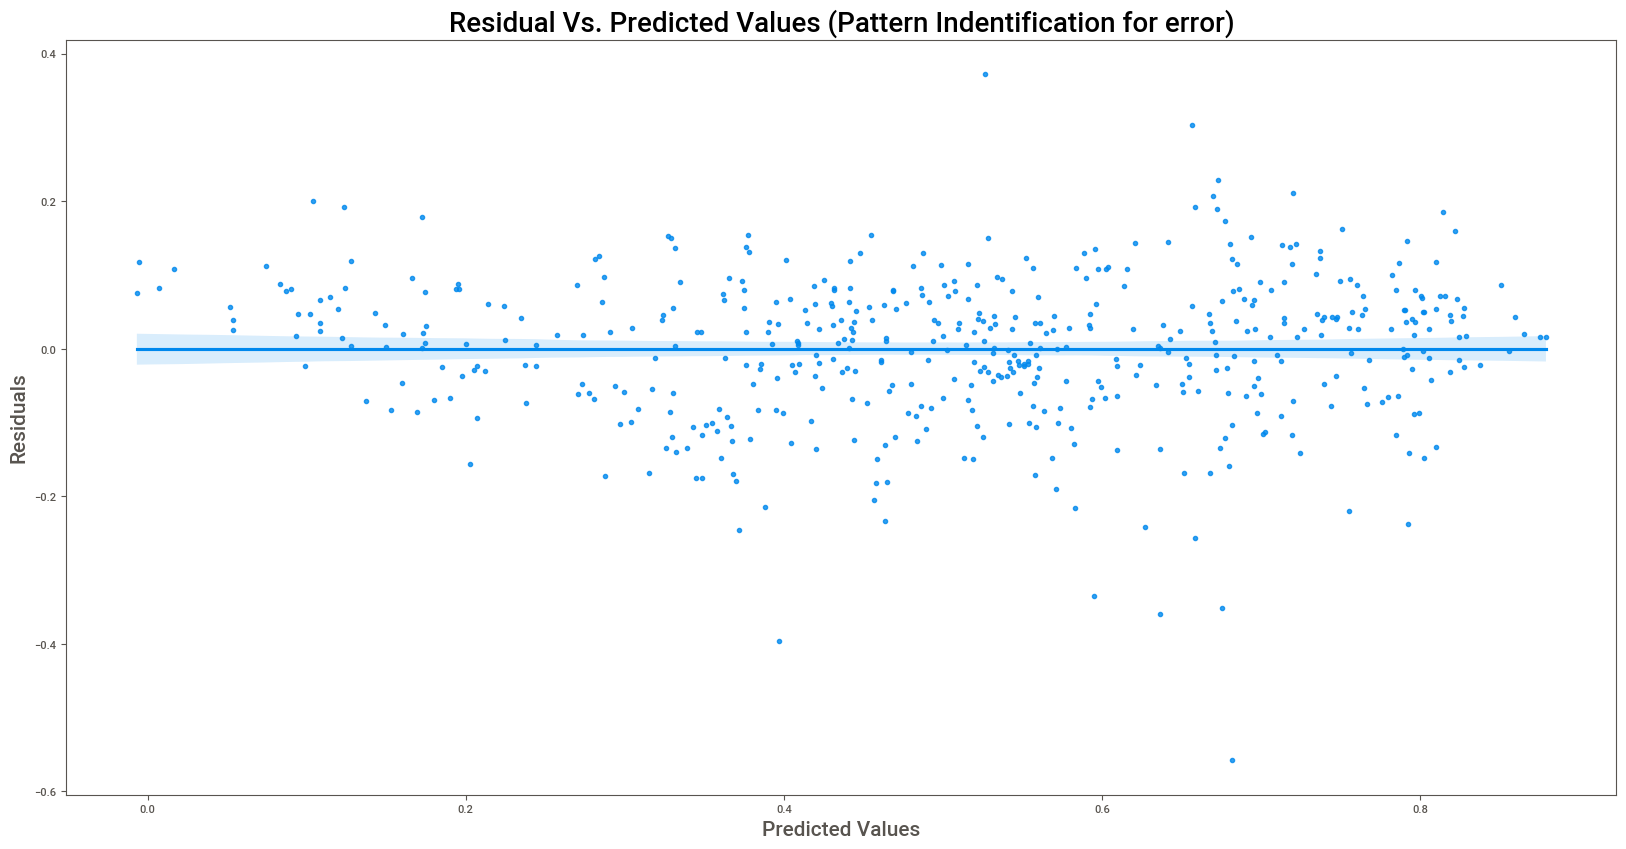

In [91]:
# validating homoscedasticity
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x=y_train_pred, y=res,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification for error)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

Text(0, 0.5, 'Y_test_pre')

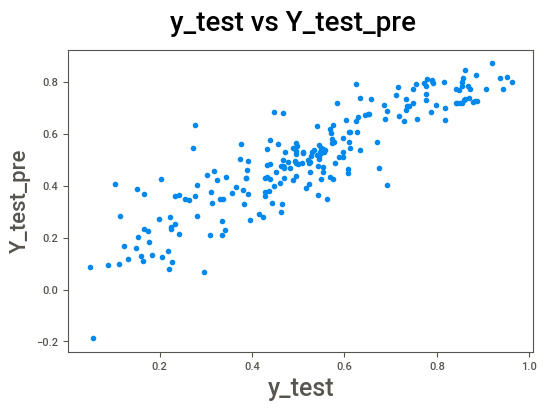

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs Y_test_pre', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Y_test_pre', fontsize=16) 

# Formula
Equation for best fit line is

CNT(Target variable) = 0.5935 + (yr * 0.2462) + (holiday * -0.0859)  + (windspeed * -0.1829) + (season_spring * -0.1952) +(season_summer * -0.0629)  + (mnth_Dec * -0.1330) + (mnth_Feb * -0.1004) +(mnth_Jan * -0.1674) + (mnth_May * 0.0567) +(mnth_Nov * -0.1134) + (mnth_Sept * 0.0551) + (weekday_Tues * -0.0515 ) + ( weathersit_B * -0.0910) + (weathersit_C * -0.3187)


# RFE

In [93]:
# using sklearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [94]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [95]:
rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(x_train, y_train)

In [96]:
# checking the column weightage and RFE suppourt
print(list(zip(x_train.columns, rfe.support_, rfe.ranking_)), '\n')
columns = x_train.columns[rfe.support_]
print(columns, '\n')
print(f"columns which are not supported by RFE:{x_train.columns[~rfe.support_]}")

[('yr', True, 1), ('holiday', True, 1), ('workingday', False, 2), ('temp', True, 1), ('atemp', False, 16), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', True, 1), ('season_winter', True, 1), ('mnth_Aug', False, 8), ('mnth_Dec', False, 5), ('mnth_Feb', False, 6), ('mnth_Jan', False, 3), ('mnth_Jul', True, 1), ('mnth_Jun', False, 15), ('mnth_Mar', False, 17), ('mnth_May', False, 7), ('mnth_Nov', False, 4), ('mnth_Oct', False, 12), ('mnth_Sept', True, 1), ('weekday_Mon', True, 1), ('weekday_Sat', False, 14), ('weekday_Sun', False, 13), ('weekday_Thurs', False, 11), ('weekday_Tues', False, 9), ('weekday_Wed', False, 10), ('weathersit_B', True, 1), ('weathersit_C', True, 1)] 

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Mon', 'weathersit_B', 'weathersit_C'],
      dtype='object') 

columns which are not supported by RFE:Index(['workingday', 'at

In [97]:
# building modele using statsmodel api
def state_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm, x_train_sm

In [98]:
# this function will take cols as params and generate VIF
def show_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [99]:
# Model 1 using RFE Recommandations

In [100]:
model = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.51e-190
Time:                        23:46:39   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2796      0.035      8.096

We have verified using both stats model and RFE and we have below inferences

# Model Interpretetion
significant variable for model building and predicting the target value cnt are listed as below 'yr', 'holiday', 'windspeed', 'season_spring', 'season_summer','mnth_Dec', 'mnth_Feb','mnth_Jan','mnth_May','mnth_Nov', 'mnth_September','weekday_Tues', 'weathersit_Light Rain', 'weathersit_cl'
Variable to focus on : holiday, weathersit_clear, mnth_May,mnth_Sept
unit increment in weathersit_clear raise the cnt by 0.56 units
unit increment in mnth_May raise the cnt by 0.05 units
unit increment in mnth_Sept raise the cnt by 0.081 units
unit increment in holiday decreases the cnt by 0.0859 units